GD Accuracy: 1.0
GD Confusion Matrix:
 [[10  0]
 [ 0 10]]
Library Accuracy: 1.0
Library Confusion Matrix:
 [[10  0]
 [ 0 10]]


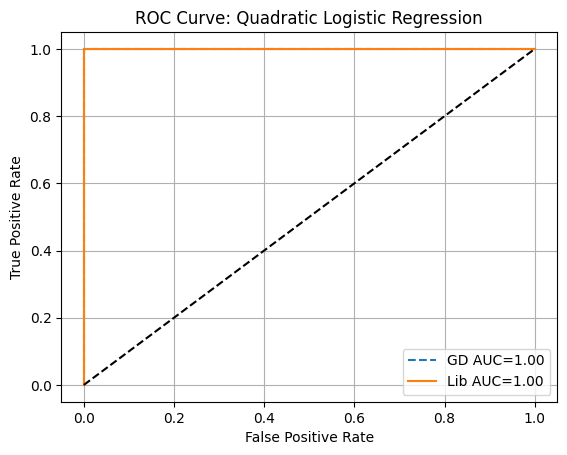

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Load and preprocess
iris = load_iris()
X_raw = iris.data[iris.target != 2][:, :2]  # Use first two features only
y = iris.target[iris.target != 2]

# Quadratic feature expansion
X_quad = np.column_stack([
    X_raw[:, 0]**2, X_raw[:, 1]**2,
    X_raw[:, 0]*X_raw[:, 1],
    X_raw[:, 0], X_raw[:, 1], 
    np.ones(X_raw.shape)
])

# Train-test split using expanded features
# ...previous code...
X_train, X_test, y_train, y_test = train_test_split(X_quad, y, test_size=0.2, random_state=0)

def sigmoid(z): return 1 / (1 + np.exp(-z))

w = np.zeros(X_train.shape[1])  # Correct: shape (n_features,)
for _ in range(2000):
    y_hat = sigmoid(X_train @ w)
    error = y_hat - y_train
    w -= 0.01 * X_train.T @ error / len(y_train)
# ...rest of code...

y_prob_gd = sigmoid(X_test @ w)
y_pred_gd = y_prob_gd >= 0.5

# Sklearn LR
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_lib = model.predict(X_test)
y_prob_lib = model.predict_proba(X_test)[:, 1]

# Metrics and ROC
print("GD Accuracy:", accuracy_score(y_test, y_pred_gd))
print("GD Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gd))
print("Library Accuracy:", accuracy_score(y_test, y_pred_lib))
print("Library Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lib))
fpr_gd, tpr_gd, _ = roc_curve(y_test, y_prob_gd)
fpr_lib, tpr_lib, _ = roc_curve(y_test, y_prob_lib)
plt.plot(fpr_gd, tpr_gd, '--', label=f'GD AUC={roc_auc_score(y_test, y_prob_gd):.2f}')
plt.plot(fpr_lib, tpr_lib, label=f'Lib AUC={roc_auc_score(y_test, y_prob_lib):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.title("ROC Curve: Quadratic Logistic Regression")
plt.show()


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



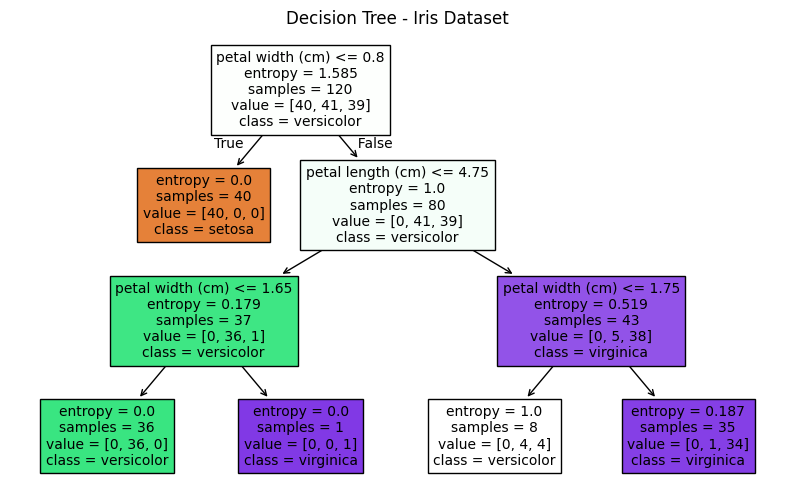

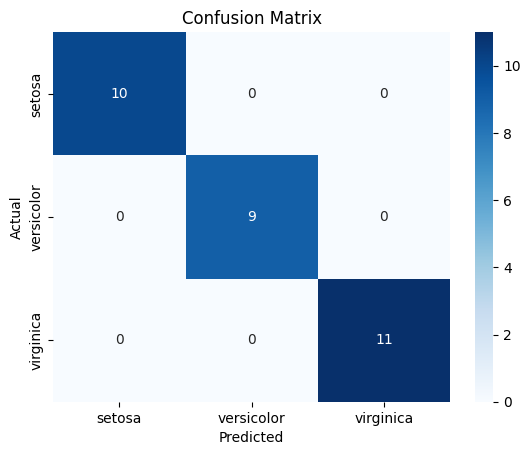

In [5]:
# 1. Import libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# 3. Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)

# 5. Predict and Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 6. Visualize Tree
plt.figure(figsize=(10,6))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree - Iris Dataset")
plt.show()

# 7. Visualize Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
           xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Max Depth = 2
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



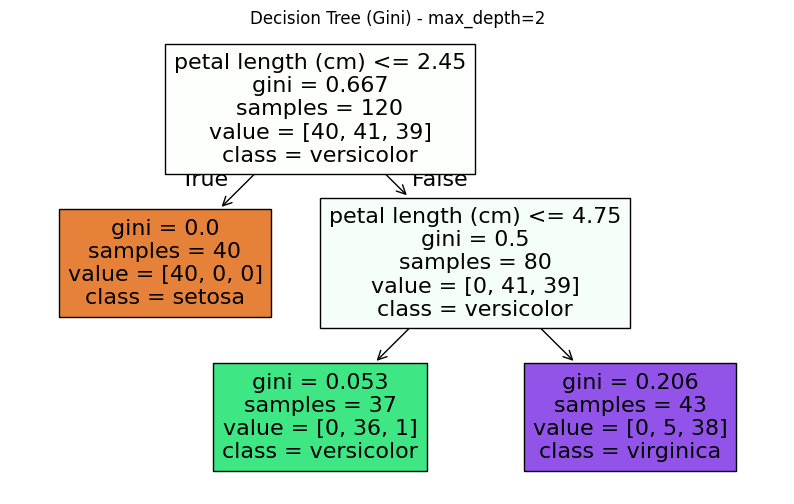


Max Depth = 4
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



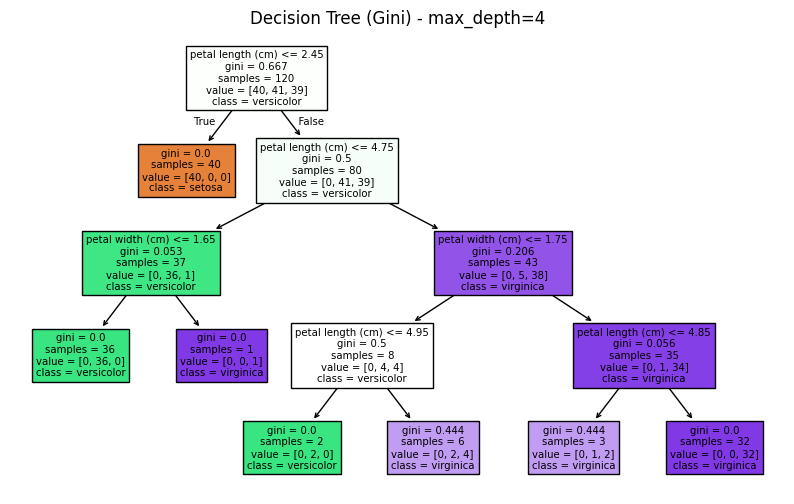

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Values of max_depth to test
for max_d in [2, 4]:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=max_d, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(f"\nMax Depth = {max_d}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Visualize tree
    plt.figure(figsize=(10,6))
    plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
    plt.title(f"Decision Tree (Gini) - max_depth={max_d}")
    plt.show()


Gradient Descent Accuracy: 1.0
Gradient Descent Confusion Matrix:
 [[10  0]
 [ 0 10]]
Gradient Descent AUC: 1.0

Library Accuracy: 1.0
Library Confusion Matrix:
 [[10  0]
 [ 0 10]]
Library AUC: 1.0


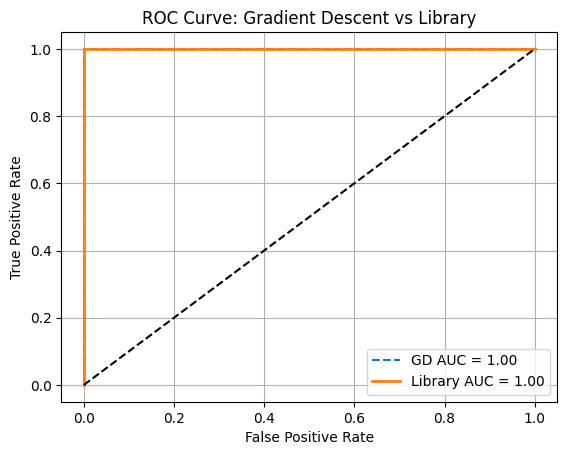

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Load binary classification dataset (Setosa vs Versicolor)
iris = load_iris()
X = iris.data[iris.target != 2]
y = iris.target[iris.target != 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# ----------------------------
# Gradient Descent based Logistic Regression
# ----------------------------
def sigmoid(z): return 1 / (1 + np.exp(-z))

w = np.zeros(X_train.shape[1])
b = 0
lr = 0.01
epochs = 2000

for _ in range(epochs):
    z = X_train @ w + b
    y_hat = sigmoid(z)
    error = y_hat - y_train
    w -= lr * X_train.T @ error / len(y_train)
    b -= lr * np.mean(error)

# Predict using GD
y_prob_gd = sigmoid(X_test @ w + b)
y_pred_gd = (y_prob_gd >= 0.5).astype(int)
acc_gd = accuracy_score(y_test, y_pred_gd)
conf_gd = confusion_matrix(y_test, y_pred_gd)
fpr_gd, tpr_gd, _ = roc_curve(y_test, y_prob_gd)
auc_gd = roc_auc_score(y_test, y_prob_gd)

# ----------------------------
# Sklearn Logistic Regression
# ----------------------------
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_lib = model.predict(X_test)
y_prob_lib = model.predict_proba(X_test)[:, 1]

acc_lib = accuracy_score(y_test, y_pred_lib)
conf_lib = confusion_matrix(y_test, y_pred_lib)
fpr_lib, tpr_lib, _ = roc_curve(y_test, y_prob_lib)
auc_lib = roc_auc_score(y_test, y_prob_lib)

# ----------------------------
# Results
# ----------------------------
print("Gradient Descent Accuracy:", acc_gd)
print("Gradient Descent Confusion Matrix:\n", conf_gd)
print("Gradient Descent AUC:", auc_gd)

print("\nLibrary Accuracy:", acc_lib)
print("Library Confusion Matrix:\n", conf_lib)
print("Library AUC:", auc_lib)

# ----------------------------
# ROC Curve Plot
# ----------------------------
plt.plot(fpr_gd, tpr_gd, label=f'GD AUC = {auc_gd:.2f}', linestyle='--')
plt.plot(fpr_lib, tpr_lib, label=f'Library AUC = {auc_lib:.2f}', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Gradient Descent vs Library")
plt.legend()
plt.grid()
plt.show()